In [1]:
#Estas son las librerias que vas a usar
import geopandas as gpd
import matplotlib.pyplot as plt
from mapclassify import classify
import pandas as pd
import numpy as np
import folium
import geopy

1. Crea un mapa para visualizar el archivo:
https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_1_states_provinces_shp.geojson

In [2]:
# Leer el archivo geojson y cargarlo en un GeoDataFrame de geopandas
data = gpd.read_file("https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_1_states_provinces_shp.geojson")

# Crear un mapa de folium centrado en América del Norte
mapa = folium.Map(location=[45,-100], zoom_start=3)

# Añadir las geometrías del GeoDataFrame al mapa utilizando GeoJson
folium.GeoJson(data).add_to(mapa)

# Mostrar el mapa
mapa


2. Obtener toda la información sobre el dataframe.

In [3]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   scalerank     51 non-null     int64   
 1   adm1_code     51 non-null     object  
 2   diss_me       51 non-null     int64   
 3   adm1_cod_1    51 non-null     object  
 4   iso_3166_2    51 non-null     object  
 5   wikipedia     51 non-null     object  
 6   sr_sov_a3     51 non-null     object  
 7   sr_adm0_a3    51 non-null     object  
 8   iso_a2        51 non-null     object  
 9   adm0_sr       51 non-null     int64   
 10  admin0_lab    51 non-null     int64   
 11  name          51 non-null     object  
 12  name_alt      51 non-null     object  
 13  name_local    0 non-null      float64 
 14  type          51 non-null     object  
 15  type_en       51 non-null     object  
 16  code_local    51 non-null     object  
 17  code_hasc     51 non-null     object  
 18  note

3. Obtener estadísticas descriptivas de las columnas del dataframe

In [4]:
data.describe()

,scalerank,diss_me,adm0_sr,admin0_lab,name_local,note,region_cod,big_code,provnum_ne,gadm_level,check_me,scaleran_1,datarank,area_sqkm,sameascity,labelrank,name_len,mapcolor9,mapcolor13
count,51.0,51.000000,51.000000,51.0,0.0,0.0,0.0,0.0,51.0,51.0,51.000000,51.0,51.000000,51.0,51.000000,51.000000,51.000000,51.0,51.0
mean,2.0,3538.000000,2.627451,2.0,NaN,NaN,NaN,NaN,0.0,1.0,0.588235,2.0,1.137255,0.0,-96.882353,0.176471,8.666667,1.0,1.0
std,0.0,14.866069,2.332044,0.0,NaN,NaN,NaN,NaN,0.0,0.0,2.376354,0.0,0.980196,0.0,15.123025,1.260252,3.076795,0.0,0.0
min,2.0,3513.000000,1.000000,2.0,NaN,NaN,NaN,NaN,0.0,1.0,0.000000,2.0,1.000000,0.0,-99.000000,0.000000,4.000000,1.0,1.0
25%,2.0,3525.500000,1.000000,2.0,NaN,NaN,NaN,NaN,0.0,1.0,0.000000,2.0,1.000000,0.0,-99.000000,0.000000,7.000000,1.0,1.0
50%,2.0,3538.000000,1.000000,2.0,NaN,NaN,NaN,NaN,0.0,1.0,0.000000,2.0,1.000000,0.0,-99.000000,0.000000,8.000000,1.0,1.0
75%,2.0,3550.500000,5.000000,2.0,NaN,NaN,NaN,NaN,0.0,1.0,0.000000,2.0,1.000000,0.0,-99.000000,0.000000,10.000000,1.0,1.0
max,2.0,3563.000000,8.000000,2.0,NaN,NaN,NaN,NaN,0.0,1.0,10.000000,2.0,8.000000,0.0,9.000000,9.000000,20.000000,1.0,1.0


4. ¿Cuántos países están representados en el archivo?

In [5]:
print(data['name'].nunique())
data['name'].unique()


51


array(['Minnesota', 'Montana', 'North Dakota', 'Hawaii', 'Idaho',
       'Washington', 'Arizona', 'California', 'Colorado', 'Nevada',
       'New Mexico', 'Oregon', 'Utah', 'Wyoming', 'Arkansas', 'Iowa',
       'Kansas', 'Missouri', 'Nebraska', 'Oklahoma', 'South Dakota',
       'Louisiana', 'Texas', 'Connecticut', 'Massachusetts',
       'New Hampshire', 'Rhode Island', 'Vermont', 'Alabama', 'Florida',
       'Georgia', 'Mississippi', 'South Carolina', 'Illinois', 'Indiana',
       'Kentucky', 'North Carolina', 'Ohio', 'Tennessee', 'Virginia',
       'Wisconsin', 'West Virginia', 'Delaware', 'District of Columbia',
       'Maryland', 'New Jersey', 'New York', 'Pennsylvania', 'Maine',
       'Michigan', 'Alaska'], dtype=object)

5.  ¿Cuáles son los nombres de los tres países con mayor superficie?

In [6]:
data['area'] = data.area

/var/folders/pk/6v_6dchx3_132ltyxz74zz440000gn/T/ipykernel_39225/2440170118.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data['area'] = data.area


In [7]:
top_3 = data.sort_values('area', ascending=False).head(3)
top_3_names = top_3['name'].tolist()
top_3_names

['Alaska', 'Texas', 'Montana']

6. Crea un mapa coroplético para visualizar la clasificación anterior

<Axes: >

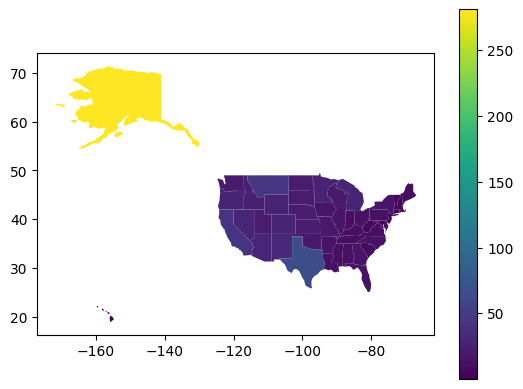

In [8]:
data.plot(column='area', legend=True)

6. Crea un mapa interactivo para visualizar los estados/provincias con los nombres de las entidades

In [9]:
data.explore(column='area')